In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')
test = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')
sub = pd.read_csv('/kaggle/input/home-data-for-ml-course/sample_submission.csv')

# EDA
## Column
- id, index : 학습에 영향x
- string(object) : one-hot, label encoding
- int : 단위 맞춰주기, scaling


In [3]:
pd.options.display.max_columns = 999
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [4]:
len(test)

1459

In [5]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

# Visualize

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
train.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

## 상관관계가 높은 컬럼들 scatterplot으로 시각화 분석

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

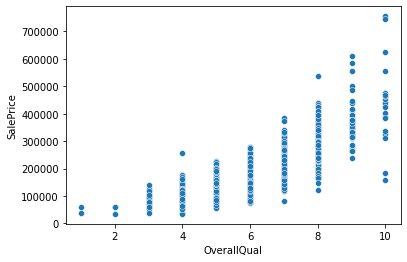

In [8]:
# OverallQual
sns.scatterplot(train['OverallQual'], train['SalePrice'])

- 양의 상관관계
- 0.6이상이므로 상관관계가 강함 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

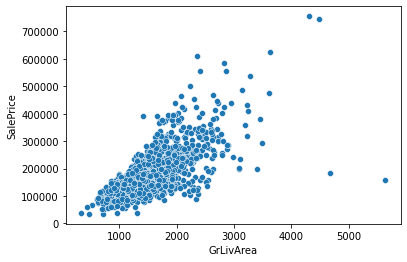

In [9]:
# GrLivArea
sns.scatterplot(train['GrLivArea'], train['SalePrice'])

- outlier 확인

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

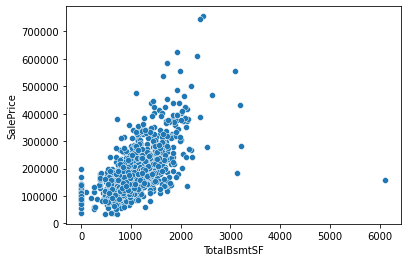

In [10]:
# TotalBsmtSF
sns.scatterplot(train['TotalBsmtSF'], train['SalePrice'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

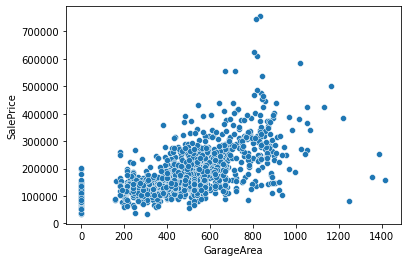

In [11]:
# GarageArea
sns.scatterplot(train['GarageArea'], train['SalePrice'])

### Oulier 처리

In [12]:
# GrLivArea 

train = train.drop(train[train['GrLivArea'] > 4600].index)

In [13]:
# TotalBsmtSF 

train = train.drop(train[train['TotalBsmtSF'] > 3000].index)

In [14]:
# GarageArea 

train = train.drop(train[train['GarageArea'] > 1200].index)

### train, test 합쳐서 EDA
- 합쳐서 label encoding 등 전처리

In [15]:
alldata = pd.concat([train, test])
alldata

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,

### 결측치 처리

In [16]:
alldata.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       484
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

- 결측치 채우기
    - 꼭 0으로만 채우는게 아님( 기존 0인 데이터에 영향이 갈 수 있음)
    - 이번 대회는 -1 데이터가 없어 -1로 채우기
- Label 인코딩 (Object 형식인 컬럼들만 접근)
- alldata => train2, test2 만들기

In [17]:
alldata2 = alldata.fillna(-1)

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [19]:
c = alldata2.columns[alldata2.dtypes == object]
for i in c:
    alldata2[i] = le.fit_transform(list(alldata2[i]))

In [20]:
alldata2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,4,65.0,8450,1,0,3,3,1,4,0,5,2,2,0,5,7,5,2003,2003,1,0,13,14,2,196.0,2,4,2,3,4,4,3,706.0,6,0.0,150.0,856.0,1,0,1,5,856,854,0,1710,1.0,0.0,2,1,3,1,3,8,7,0,0,2,2003.0,2,2.0,548.0,5,5,2,0,61,0,0,0,0,0,0,0,0,2,2008,9,4,208500.0
1,2,20,4,80.0,9600,1,0,3,3,1,2,0,24,1,2,0,2,6,8,1976,1976,1,0,9,9,3,0.0,3,4,1,3,4,2,1,978.0,6,0.0,284.0,1262.0,1,0,1,5,1262,0,0,1262,0.0,1.0,2,0,3,1,4,6,7,1,5,2,1976.0,2,2.0,460.0,5,5,2,298,0,0,0,0,0,0,0,0,0,5,2007,9,4,181500.0
2,3,60,4,68.0,11250,1,0,0,3,1,4,0,5,2,2,0,5,7,5,2001,2002,1,0,13,14,2,162.0,2,4,2,3,4,3,3,486.0,6,0.0,434.0,920.0,1,0,1,5,920,866,0,1786,1.0,0.0,2,1,3,1,3,6,7,1,5,2,2001.0,2,2.0,608.0,5,5,2,0,42,0,0,0,0,0,0,0,0,9,2008,9,4,223500.0
3,4,70,4,60.0,9550,1,0,0,3,1,0,0,6,2,2,0,5,7,5,1915,1970,1,0,14,16,3,0.0,3,4,0,4,2,4,1,216.0,6,0.0,540.0,756.0,1,2,1,5,961,756,0,1717,1.0,0.0,1,0,3,1,3,7,7,1,3,6,1998.0,3,3.0,642.0,5,5,2,0,35,272,0,0,0,0,0,0,0,2,2006,9,0,140000.0
4,5,60,4,84.0,14260,1,0,0,3,1,2,0,15,2,2,0,5,8,5,2000,2000,1,0,13,14,2,350.0,2,4,2,3,4,1,3,655.0,6,0.0,490.0,1145.0,1,0,1,5,1145,1053,0,2198,1.0,0.0,2,1,4,1,3,9,7,1,5,2,2000.0,2,3.0,836.0,5,5,2,192,84,0,0,0,0,0,0,0,0,12,2008,9,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,5,21.0,1936,1,0,3,3,1,4,0,10,2,2,3,5,4,7,1970,1970,1,0,6,6,3,0.0,3,4,1,4,4,4,6,0.0,6,0.0,546.0,546.0,1,2,1,5,546,546,0,1092,0.0,0.0,1,1,3,1,4,5,7,0,0,0,-1.0,0,0.0,0.0,0,0,2,0,0,0,0,0,0,0,0,0,0,6,2006,9,4,-1.0
1455,2916,160,5,21.0,1894,1,0,3,3,1,4,0,10,2,2,4,5,4,5,1970,1970,1,0,6,6,3,0.0,3,4,1,4,4,4,5,252.0,6,0.0,294.0,546.0,1,4,1,5,546,546,0,1092,0.0,0.0,1,1,3,1,4,6,7,0,0,5,1970.0,3,1.0,286.0,5,5,2,0,24,0,0,0,0,0,0,0,0,4,2006,9,0,-1.0
1456,2917,20,4,160.0,20000,1,0,3,3,1,4,0,11,2,2,0,2,5,7,1960,1996,1,0,13,14,3,0.0,3,4,1,4,4,4,1,1224.0,6,0.0,0.0,1224.0,1,0,1,5,1224,0,0,1224,1.0,0.0,1,0,4,1,4,7,7,1,5,6,1960.0,3,2.0,576.0,5,5,2,474,0,0,0,0,0,0,0,0,0,9,2006,9,0,-1.0
1457,2918,85,4,62.0,10441,1,0,3,3,1,4,0,11,2,2,0,6,5,5,1992,1992,1,0,7,16,3,0.0,3,4,2,3,4,1,3,337.0,6,0.0,575.0,912.0,1,4,1,5,970,0,0,970,0.0,1.0,1,0,3,1,4,6,7,0,0,0,-1.0,0,0.0,0.0,0,0,2,80,32,0,0,0,0,0,3,3,700,7,2006,9,4,-1.0


### Scaler
- refer([blog1](https://mkjjo.github.io/python/2019/01/10/scaler.html))
- log scaling

In [21]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()

alldata2 = rs.fit_transform(alldata2)

In [22]:
# np. array 형태로 바뀜
alldata2

array([[-1.00342818,  0.2       ,  0.        , ...,  0.        ,
         0.        ,  1.28406292],
       [-1.00274254, -0.6       ,  0.        , ...,  0.        ,
         0.        ,  1.11778218],
       [-1.00205691,  0.2       ,  0.        , ...,  0.        ,
         0.        ,  1.3764411 ],
       ...,
       [ 0.99588618, -0.6       ,  0.        , ...,  0.        ,
        -4.        ,  0.        ],
       [ 0.99657182,  0.7       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.99725746,  0.2       ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [23]:
alldata3 = pd.DataFrame(alldata2, columns = alldata.columns)

In [24]:
alldata3

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.003428,0.2,0.0,0.057143,-0.242786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.7,0.0,0.0,0.0,1.000000,0.5,0.0,0.625000,0.256410,0.0,0.0,0.00,0.0,-1.0,1.209877,-1.0,0.0,1.0,0.0,0.0,0.0,0.00,0.461749,0.0,0.0,-0.544048,-0.259970,0.0,0.0,0.0,0.0,-0.444773,1.213068,0.0,0.434536,1.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.0,-1.0,-0.333333,0.00,0.590909,0.0,0.0,0.273438,0.0,0.0,0.0,0.000000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.00,0.0,0.0,0.0,1.284063
1,-1.002743,-0.6,0.0,0.485714,0.040239,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.2,-1.0,0.0,0.0,0.000000,0.0,3.0,0.062500,-0.435897,0.0,0.0,-1.00,-1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-1.0,-0.50,0.833333,0.0,0.0,-0.313709,0.539636,0.0,0.0,0.0,0.0,0.356016,0.000000,0.0,-0.291852,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.333333,0.00,-0.022727,0.0,0.0,-0.070312,0.0,0.0,0.0,1.773810,-0.371429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.5,0.0,0.0,1.117782
2,-1.002057,0.2,0.0,0.142857,0.446318,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-0.7,0.0,0.0,0.0,1.000000,0.5,0.0,0.583333,0.230769,0.0,0.0,0.00,0.0,-1.0,1.000000,-1.0,0.0,1.0,0.0,0.0,-0.5,0.00,0.161202,0.0,0.0,-0.055866,-0.133924,0.0,0.0,0.0,0.0,-0.318540,1.230114,0.0,0.557762,1.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.333333,0.00,0.545455,0.0,0.0,0.507812,0.0,0.0,0.0,0.000000,0.228571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.0,1.376441
3,-1.001371,0.4,0.0,-0.085714,0.027933,0.0,0.0,-1.0,0.0,0.0,-2.0,0.0,-0.6,0.0,0.0,0.0,1.000000,0.5,0.0,-1.208333,-0.589744,0.0,0.0,0.25,0.4,0.0,0.000000,0.0,0.0,-1.0,1.0,-2.0,0.0,-0.50,-0.207650,0.0,0.0,0.126343,-0.456918,0.0,0.5,0.0,0.0,-0.237673,1.073864,0.0,0.445886,1.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.5,0.0,0.0,0.666667,1.00,0.477273,0.5,1.0,0.640625,0.0,0.0,0.0,0.000000,0.128571,272.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.00,-1.0,0.0,-4.0,0.862203
4,-1.000686,0.2,0.0,0.600000,1.187104,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.3,0.0,0.0,0.0,1.000000,1.0,0.0,0.562500,0.179487,0.0,0.0,0.00,0.0,-1.0,2.160494,-1.0,0.0,1.0,0.0,0.0,-1.5,0.00,0.392077,0.0,0.0,0.040395,0.309207,0.0,0.0,0.0,0.0,0.125247,1.495739,0.0,1.225780,1.0,0.0,0.0,1.0,1.0,0.0,-1.0,1.5,0.0,0.0,1.333333,0.00,0.522727,0.0,1.0,1.398438,0.0,0.0,0.0,1.142857,0.828571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.50,0.0,0.0,0.0,1.539643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,0.994515,2.2,1.0,-1.200000,-1.845936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.2,0.0,0.0,3.0,1.000000,-1.0,2.0,-0.062500,-0.589744,0.0,0.0,-1.75,-1.6,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.75,-0.502732,0.0,0.0,0.136657,-0.870507,0.0,0.5,0.0,0.0,-1.056213,0.775568,0.0,-0.567491,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,-0.5,0.0,-1.0,-0.333333,-0.50,-44.954545,-1.0,-2.0,-1.867188,-5.0,-5.0,0.0,0.000000,-0.371429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-1.0,0.0,0.0,0.000000
2906,0.995201,2.2,1.0,-1.200000,-1.856273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.2,0.0,0.0,4.0,1.000000,-1.0,0.0,-0.062500,-0.589744,0.0,0.0,-1.75,-1.6,0.0,0.000000,0.0,0.0,0.0,1.0

In [25]:
train2 = alldata3[:len(train)]
test2 = alldata3[len(train):]

In [26]:
train2 = train2.drop(columns = ['SalePrice', 'Id'])
test2 = test2.drop(columns = ['SalePrice', 'Id'])

# Model
- regression : Ridge, Lasso
- reference([blog1](https://modern-manual.tistory.com/22))


In [27]:
from sklearn.linear_model import Ridge

R = Ridge(alpha = 17)
R.fit(train2, np.log(train['SalePrice']))
result = R.predict(test2)
result

# from xgboost import XGBRegressor

# model = XGBRegressor(learning_rate = 0.1)

# model.fit(train2, np.log(train['SalePrice']))

# result = model.predict(test2)

array([11.70823202, 11.96973828, 12.07738059, ..., 12.00923223,
       11.65257952, 12.34210896])

In [28]:
# croos validation
from sklearn.model_selection import cross_val_score

#rmse 
# ridge alpha 값 찾기
for i in [15, 16, 17, 18]:
    print(i)
    R_cv = Ridge(alpha = i)
    score = cross_val_score(R_cv, train2, 
                            np.log(train['SalePrice']), 
                            n_jobs = -1,
                            cv = 10,
                            scoring = 'neg_mean_squared_error'
                           ).mean()
    
    print(np.sqrt(-score))

15
0.12175619412378454
16
0.12175153386913261
17
0.12174756216466444
18
0.1217442784628419


In [29]:
sub['SalePrice'] = np.exp(result)

In [30]:
# LB score => 16824.38227 : 'SalePrice'를 scaling 안해줌
# LB score => 13400.69259 : columns들 roubustscaling, 'SalePrice': log scaling
# LB score => 14821.99675
# LB score => 13565.04212 : ridge(alpha = 17) + cross validation
sub.to_csv('Ridge_cross_val.csv', index = 0)